**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Felipe Enrique Vazquez Ruiz
*   MATRÍCULA: A01638116


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire: 

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje total de valores faltantes

In [1]:
import pandas as pd
air_df=pd.read_csv('./LaqnData.csv')
air_df.info()
air_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


Site Species   ReadingDateTime  Value   Units Provisional or Ratified
0  CT3      NO  01/01/2017 00:00    3.5  ug m-3                       R
1  CT3      NO  01/01/2017 01:00    3.6  ug m-3                       R
2  CT3      NO  01/01/2017 02:00    2.2  ug m-3                       R
3  CT3      NO  01/01/2017 03:00    2.1  ug m-3                       R
4  CT3      NO  01/01/2017 04:00    3.3  ug m-3                       R

2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [2]:
mediciones=len(air_df)
print(f"Numero de mediciones: {mediciones}")
contaminantes=air_df.Species.unique()
print(f"El numer de contaminantes es: {len(contaminantes)}")
sites=air_df.Site.unique()
print(f"El numero de sitios es: {len(sites)}")
units=air_df.Units.unique()
print(f"El numero de unidades es: {len(units)}")
opciones=air_df['Provisional or Ratified'].unique()
print(f"El numero de opciones es: {len(opciones)}")
air_df.drop(['Site','Provisional or Ratified'],axis=1, inplace=True)
air_df.head()

Numero de mediciones: 43800
El numer de contaminantes es: 5
El numero de sitios es: 1
El numero de unidades es: 3
El numero de opciones es: 1


Species   ReadingDateTime  Value   Units
0      NO  01/01/2017 00:00    3.5  ug m-3
1      NO  01/01/2017 01:00    3.6  ug m-3
2      NO  01/01/2017 02:00    2.2  ug m-3
3      NO  01/01/2017 03:00    2.1  ug m-3
4      NO  01/01/2017 04:00    3.3  ug m-3

3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [3]:
Frecuency_table=air_df.Species.value_counts()
print(Frecuency_table)
total=0
for i in range(len(Frecuency_table)):
    total+=Frecuency_table[i]
print(f"El numero total de mediciones es {mediciones} y la suma de todas las mediciones por especie es {total}")

Species
NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: count, dtype: int64
El numero total de mediciones es 43800 y la suma de todas las mediciones por especie es 43800


C:\Users\k_iki\AppData\Local\Temp\ipykernel_4256\3170807613.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total+=Frecuency_table[i]


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [4]:
contaminanteMean=air_df.groupby('Species').Value.mean()
print(contaminanteMean)

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [5]:
pvt_df=air_df.pivot(columns='Species',index='ReadingDateTime',values='Value')
print(pvt_df)

Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [6]:

MaxNo2=pvt_df[pvt_df['NO2']==pvt_df['NO2'].max()]
print(f"El dia {MaxNo2.index[0]} se registro el mayor valor de NO2 {MaxNo2['NO2']}")
MinPM10=pvt_df[pvt_df['PM10']==pvt_df['PM10'].min()]
print(f"El dia {MinPM10.index[0]} se registro el menor valor de PM10 {MinPM10['NO2']}")
print(f"La mediana de NO es: {pvt_df['NO'].median()}")
print(f"El primer cuartil de PM2.5 se encuentra en: {1/4*len(pvt_df['PM2.5'])}")
pvt_df.describe()


El dia 24/01/2017 19:00 se registro el mayor valor de NO2 ReadingDateTime
24/01/2017 19:00    120.2
Name: NO2, dtype: float64
El dia 12/09/2017 23:00 se registro el menor valor de PM10 ReadingDateTime
12/09/2017 23:00    7.0
Name: NO2, dtype: float64
La mediana de NO es: 7.1
El primer cuartil de PM2.5 se encuentra en: 2190.0


Species           NO          NO2          NOX         PM10        PM2.5
count    8660.000000  8660.000000  8660.000000  8657.000000  5933.000000
mean       15.045115    38.010185    61.078661    22.551704    14.999831
std        26.678565    18.580841    54.584805    15.344755    13.558588
min        -2.000000     2.800000     1.000000    -5.600000    -8.000000
25%         3.100000    23.800000    30.300000    13.900000     7.000000
50%         7.100000    35.300000    46.900000    19.500000    11.000000
75%        15.500000    49.900000    73.800000    27.300000    18.000000
max       401.799990   120.200000   734.299990   633.099980   128.000000

7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

El NO2 es el que mayot variabilidad presenta debido a que su histograma se encuentra con mayor distribución.

<Axes: ylabel='Frequency'>

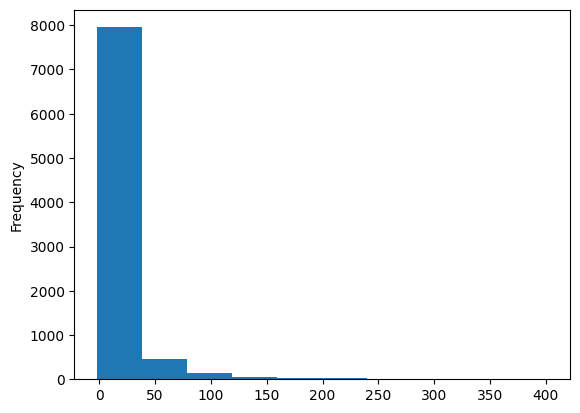

In [7]:
pvt_df['NO'].plot.hist()

<Axes: ylabel='Frequency'>

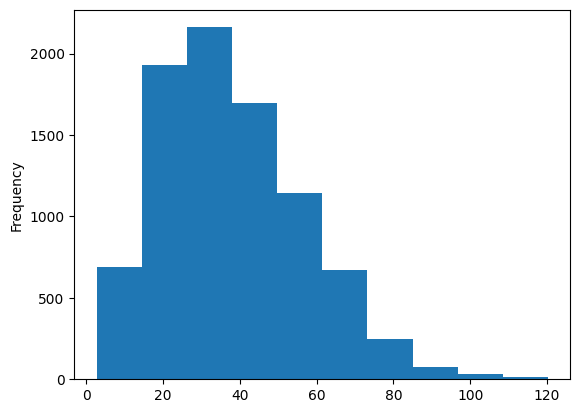

In [8]:
pvt_df['NO2'].plot.hist()

<Axes: ylabel='Frequency'>

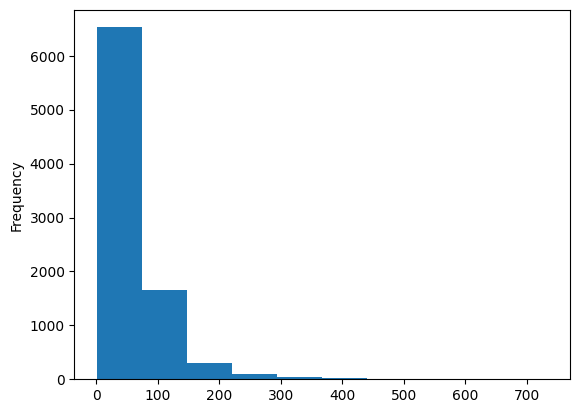

In [9]:
pvt_df['NOX'].plot.hist()

<Axes: ylabel='Frequency'>

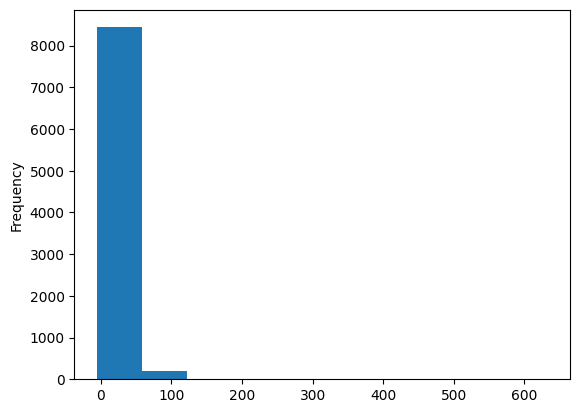

In [10]:
pvt_df['PM10'].plot.hist()

<Axes: ylabel='Frequency'>

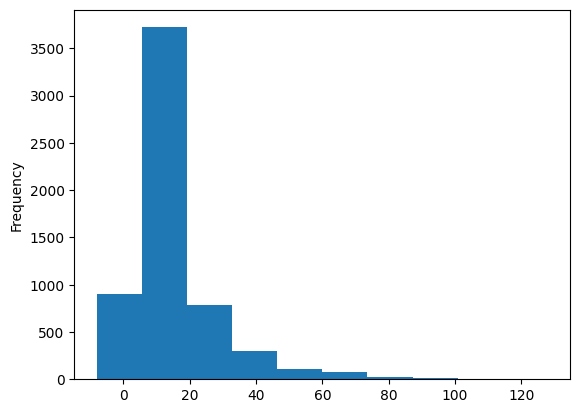

In [11]:
pvt_df['PM2.5'].plot.hist()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [12]:
#Covierte cada entrada de fecha/tiempo en un string para separar la fecha de la hora y generar un nuevo dataset
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#Asigna el nombre  las dos columnas generadas a partir de la linea anterior
datetime_df.columns = ['Date','Time']
#Muestra el dataset ya formateado 
datetime_df
#Separa la columna de la fecha en los diferenes campos dia, mes y anio
date_df = datetime_df.Date.str.split('/',expand=True)
#Asigna el nomre de las nuevas columnas generadas
date_df.columns = ['Day','Month','Year']
date_df
#Une los dos dataset creados previaments, seleccionando todo el dataset de fecha y seleccionando solamente la columna de tiempo del primer dataset generado
#De igual forma elimina las columnas previamente existentes del tiempo y anio
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Asigna nuevos indices al dataset original
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value   Units
Month Day Time  Species               
01    01  00:00 NO         3.5  ug m-3
          01:00 NO         3.6  ug m-3
          02:00 NO         2.2  ug m-3
          03:00 NO         2.1  ug m-3
          04:00 NO         3.3  ug m-3
...                        ...     ...
12    31  19:00 PM2.5     -2.0  ug m-3
          20:00 PM2.5      6.0  ug m-3
          21:00 PM2.5      5.0  ug m-3
          22:00 PM2.5      5.0  ug m-3
          23:00 PM2.5      6.0  ug m-3

[43800 rows x 2 columns]

9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

La diferencia existente entre el dataset mostrado en la parte inferior y el previamente generado (pvt_df) radica en que el dataset en la parte inferior es un dataset con multi-indexado, esto se puede comparar con el comportamiento de un agrupamiento por varias columnas.

In [13]:
air_df.unstack()

Value                           Units                         \
Species            NO   NO2   NOX  PM10 PM2.5      NO     NO2            NOX   
Month Day Time                                                                 
01    01  00:00   3.5  30.8  36.2  35.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          01:00   3.6  31.5  37.0  28.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          02:00   2.2  27.3  30.7  22.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          03:00   2.1  23.5  26.8  20.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          04:00   3.3  28.0  33.0  22.1   NaN  ug m-3  ug m-3  ug m-3 as NO2   
...               ...   ...   ...   ...   ...     ...     ...            ...   
12    31  19:00   0.7  17.5  18.5  16.3  -2.0  ug m-3  ug m-3  ug m-3 as NO2   
          20:00   0.7  17.5  18.6  14.5   6.0  ug m-3  ug m-3  ug m-3 as NO2   
          21:00   0.7  14.1  15.1   8.6   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          22:00   1.1  22.0  23.6  12.5   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          23:00   0.9  19.4  20.7  10.4   6.0  ug m-3  ug m-3  ug m-3 as NO2   

                                
Species           PM10   PM2.5  
Month Day Time                  
01    01  00:00  ug/m3  ug m-3  
          01:00  ug/m3  ug m-3  
          02:00  ug/m3  ug m-3  
          03:00  ug/m3  ug m-3  
          04:00  ug/m3  ug m-3  
...                ...     ...  
12    31  19:00  ug/m3  ug m-3  
          20:00  ug/m3  ug m-3  
          21:00  ug/m3  ug m-3  
          22:00  ug/m3  ug m-3  
          23:00  ug/m3  ug m-3  

[8760 rows x 10 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Ambos par de herramientas tienen la finalidad de distribuir la informacion proporcionada dentro del dataset. Ambos pares generan la posibilidad de añadir o disminuir el número de columnas existentes. 
El caso del melt que se utiliza para disminuir el número de columnas, se puede hacer refencia al comportamiento del stack ya que de igual manera disminuye el número de columnas pero genera una tabla multi-indexada que el caso de melt, esto no paso.
En su contra parte el pivot, genera un mayor número de columnas, este comportamiento es similar al  de unstack ya que de una tabla multi-indexada genera una tabla con menos indices que la original al añadir el indice eliminado a las columnas.